# Download Dataset

In [56]:
import numpy as np
import gzip, pickle, os
from urllib import request

base_uri = "http://yann.lecun.com/exdb/mnist/"

filename = [
    ["training_images","train-images-idx3-ubyte.gz"],
    ["test_images","t10k-images-idx3-ubyte.gz"],
    ["training_labels","train-labels-idx1-ubyte.gz"],
    ["test_labels","t10k-labels-idx1-ubyte.gz"]
]


def download_mnist():
    for name in filename:
        print(f'Downloading {name[1]}...')
        request.urlretrieve(f'{base_uri}{name[1]}', name[1])
        print(f'Downloaded {name[1]}!')
    print(f'Downloaded all files!')


def save_mnist():
    print(f'Saving mnist.pkl...')
    mnist = {}
    for name in filename[:2]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)
    for name in filename[-2:]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=8)
    with open("mnist.pkl", 'wb') as f:
        pickle.dump(mnist,f)
    print("Saved mnist.pkl!")


def delete_temp_files():
    for name in filename:
        print(f'Deleting temporary file {name[1]}...')
        os.remove(name[1])
        print(f'Deleted temporary file {name[1]}!')
    print(f'Deleted all temporary files!')


download_mnist()
save_mnist()
delete_temp_files()

Downloaded train-images-idx3-ubyte.gz!
Downloaded t10k-images-idx3-ubyte.gz!
Downloaded train-labels-idx1-ubyte.gz!
Downloaded t10k-labels-idx1-ubyte.gz!
Downloaded all files!
Saving mnist.pkl...
Saved mnist.pkl!
Deleting temporary file train-images-idx3-ubyte.gz...
Deleted temporary file train-images-idx3-ubyte.gz!
Deleting temporary file t10k-images-idx3-ubyte.gz...
Deleted temporary file t10k-images-idx3-ubyte.gz!
Deleting temporary file train-labels-idx1-ubyte.gz...
Deleted temporary file train-labels-idx1-ubyte.gz!
Deleting temporary file t10k-labels-idx1-ubyte.gz...
Deleted temporary file t10k-labels-idx1-ubyte.gz!
Deleted all temporary files!


# Load Dataset

In [58]:
import numpy as np
from urllib import request
import gzip
import pickle


def load():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)

        training_images, training_labels, testing_images, testing_labels = mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]
        # Normalize the images
        training_images.astype('float32')
        testing_images.astype('float32')
        training_images = training_images / 255
        testing_images = testing_images / 255
        return training_images, training_labels, testing_images, testing_labels


training_images,training_labels,testing_images,testing_labels=load()
print(f'Training images shape: {training_images.shape}')
print(f'Training labels shape: {training_labels.shape}')
print(f'Testing images shape: {testing_images.shape}')
print(f'Testing labels shape: {testing_labels.shape}')

Training images shape: (60000, 784)
Training labels shape: (60000,)
Testing images shape: (10000, 784)
Testing labels shape: (10000,)


# Display Dataset

Label: 0
Example training image: 59370


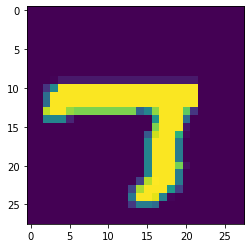

In [59]:
import matplotlib.pyplot as plt

def show_image(image):

    # Swapped out what was in the hand out code with this since it was
    # less cluttered.
    plt.imshow(image.reshape(28,28))
    plt.show()

random_index = np.random.randint(0,training_images.shape[0])

print(f'Label: {np.argmax(training_labels[random_index])}')
print(f'Example training image: {random_index}')

show_image(training_images[random_index])

# The Neural Network

In [60]:
import numpy as np
import time

class NeuralNetwork():
  def __init__ (self, layer_sizes, learning_rate, momentum, epochs, batch_size):
    self.layer_sizes = layer_sizes
    self.learning_rate = learning_rate
    self.momentum = momentum
    self.epochs = epochs
    self.batch_size = batch_size


  def train(self, training_images, training_labels):
    print('Training the neural network...')

    self.W1 = 0.1*np.random.randn(self.layer_sizes[0], self.layer_sizes[1])
    self.B1 = np.zeros((1, self.layer_sizes[1]))

    self.W2 = 0.1*np.random.randn(self.layer_sizes[1], self.layer_sizes[2])
    self.B2 = np.zeros((1, self.layer_sizes[2]))

    self.W3 = 0.1*np.random.randn(self.layer_sizes[2], self.layer_sizes[3])
    self.B3 = np.zeros((1, self.layer_sizes[3]))

    for epoch in range(self.epochs):
      start_time = time.time()

      for batch_start in range(0, training_images.shape[0], self.batch_size):
        batch_images = training_images[batch_start:batch_start+self.batch_size]
        batch_labels = training_labels[batch_start:batch_start+self.batch_size]

        # Forward pass
        hidden_layer1, hidden_layer2, probs = self._forward(batch_images)

        # Backward pass
        self._backpass(hidden_layer1=hidden_layer1, hidden_layer2=hidden_layer2, output_layer=probs, training_images=batch_images, training_labels=batch_labels)

      end_time = time.time() - start_time
      print (f'Epoch: {epoch + 1}, Time: {end_time.__round__(2)}s, Accuracy: {self.check_accuracy(training_images, training_labels).__round__(2) * 100}%')

    print('Training complete!')


  def _forward (self, training_images):
    """Performs a forward pass through the network.

    Args:
        training_images (numpy.ndarray): The training images.

    Returns:
        hidden_layer1 (numpy.ndarray): The output of the first hidden layer.
        hidden_layer2 (numpy.ndarray): The output of the second hidden layer.
        output_layer (numpy.ndarray): The output of the output layer.
    """

    hidden_layer1=self._relu(np.dot(training_images,self.W1)+self.B1)
    hidden_layer2=self._relu(np.dot(hidden_layer1,self.W2)+self.B2)
    scores=np.dot(hidden_layer2,self.W3)+self.B3

    output = self._softmax(scores)
    return hidden_layer1, hidden_layer2, output


  def _backpass (self, hidden_layer1, hidden_layer2, output_layer, training_images, training_labels):
    """Performs a backpass on the network.

    Args:
        hidden_layer1 (numpy.ndarray): The first hidden layer of the network.
        hidden_layer2 (numpy.ndarray): The second hidden layer of the network.
        hidden_layer2 (numpy.ndarray): The output layer of the network.
        training_images (numpy.ndarray): The training images.
        training_labels (numpy.ndarray): The training labels.
    """

    dscores = output_layer
    dscores[range(len(training_images)), training_labels] -= 1
    dscores /= len(training_images)

    dw3=np.dot(hidden_layer2.T,dscores)
    db3=np.sum(dscores, axis=0,keepdims=True)

    dhidden2=np.dot(dscores, self.W3.T)
    dhidden2[hidden_layer2 <=0]=0

    dw2=np.dot(hidden_layer1.T, dhidden2)
    db2=np.sum(dhidden2, axis=0,keepdims=True)

    dhidden1=np.dot(dhidden2, self.W2.T)
    dhidden1[hidden_layer1 <=0]=0

    dw1=np.dot(training_images.T, dhidden1)
    db1=np.sum(dhidden1,axis=0,keepdims=True)

    # Update delta weights.
    dw3 += self.momentum*self.W3
    dw2 += self.momentum*self.W2
    dw1 += self.momentum*self.W1

    # Updates the weights.
    self.W1 += -self.learning_rate * dw1
    self.W2 += -self.learning_rate * dw2
    self.W3 += -self.learning_rate * dw3

    # Updates biases.
    self.B1 += -self.learning_rate * db1
    self.B2 += -self.learning_rate * db2
    self.B3 += -self.learning_rate * db3

  def predict(self, image):
    """Predicts the label of an image.

    Args:
        image (numpy.ndarray): The image to predict the label of.

    Returns:
        int: The predicted label.
    """

    _, _, output = self._forward(image)
    return np.argmax(output)


  def check_accuracy (self, validation_images, validation_labels):
    """Checks the accuracy of the network on the validation set.

    Args:
        validation_images (numpy.ndarray): The validation images.
        validation_labels (numpy.ndarray): The validation labels.

    Returns:
        accuracy (float): The accuracy of the network on the validation set.
    """

    _, _, output = self._forward(validation_images)

    count = 0
    for i in range(len(validation_images)):
      if np.argmax(output[i]) == validation_labels[i]:
        count += 1
    return count / len(validation_images)


  def _relu (self, x, derivative=False):
    """Computes the rectified linear unit.
    
    Args:
        x (numpy.ndarray): The input data.
        derivative (bool): Whether to compute the derivative of the relu or not.
        
    Returns:
        numpy.ndarray: The relu of the input data.
    """    

    if derivative:
      return np.where(x > 0, 1, 0)
    return np.maximum(0, x)


  def _softmax(self, x, derivative=False):
    """Computes the softmax activation function.
    
    Args:
        x (numpy.ndarray): The input data.
        derivative (bool): Whether to compute the derivative of the softmax or not.
        
    Returns:
        numpy.ndarray: The softmax of the input data.
    """

    if derivative:
      return x * (1 - x)
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

# Network Training

In [32]:
np.random.seed(0)
nn = NeuralNetwork([784, 200, 50, 10], 0.1, 1e-3, 10, 128)
nn.train(training_images, training_labels)

Training the neural network...
Epoch: 1, Time: 2.31s, Accuracy: 91.0%
Epoch: 2, Time: 2.22s, Accuracy: 94.0%
Epoch: 3, Time: 2.69s, Accuracy: 95.0%
Epoch: 4, Time: 2.43s, Accuracy: 96.0%
Epoch: 5, Time: 2.88s, Accuracy: 97.0%
Epoch: 6, Time: 2.62s, Accuracy: 97.0%
Epoch: 7, Time: 3.68s, Accuracy: 97.0%
Epoch: 8, Time: 2.8s, Accuracy: 97.0%
Epoch: 9, Time: 2.41s, Accuracy: 98.0%
Epoch: 10, Time: 2.43s, Accuracy: 98.0%
Training complete!


# Network Prediction

In [61]:
image_index = np.random.randint(0, len(training_images))

predicted = nn.predict(training_images[image_index])
actual = training_labels[image_index]

print(f'Image number: {image_index}')
print()
print('Predicted:', predicted)
print('Actual:', actual)

Image number: 21285

Predicted: 3
Actual: 3
